In [2]:
import numpy as np
import pandas as pd

In [3]:
face = pd.read_csv("face_2.csv")
y1 = face["friend_request"]
y2 = face["rating"]
dummies = pd.get_dummies(face[['college', 'orientation','face_shape', 'color']])

In [4]:
face_lasso = face.drop(["friend_request","rating", "id", "pic_id",'college', 'orientation','face_shape', 'color'], axis=1)
face_lasso[['age', 'char_positivity', 'char_outgoing', 'char_open',
       'char_friendly', 'char_discipline', 'char_social', 'char_economic',
       'face', 'nose', 'eyes', 'mouth', 'overall_feature', 'skin', 'hair']].astype('float64')
col_list = ['age', 'char_positivity', 'char_outgoing', 'char_open',
       'char_friendly', 'char_discipline', 'char_social', 'char_economic',
       'face', 'nose', 'eyes', 'mouth', 'overall_feature', 'skin', 'hair']
col_list

['age',
 'char_positivity',
 'char_outgoing',
 'char_open',
 'char_friendly',
 'char_discipline',
 'char_social',
 'char_economic',
 'face',
 'nose',
 'eyes',
 'mouth',
 'overall_feature',
 'skin',
 'hair']

In [5]:
X = pd.concat([face_lasso, dummies], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    2220 non-null   int64
 1   male                   2220 non-null   int64
 2   char_positivity        2220 non-null   int64
 3   char_outgoing          2220 non-null   int64
 4   char_open              2220 non-null   int64
 5   char_friendly          2220 non-null   int64
 6   char_discipline        2220 non-null   int64
 7   char_social            2220 non-null   int64
 8   char_economic          2220 non-null   int64
 9   face                   2220 non-null   int64
 10  nose                   2220 non-null   int64
 11  eyes                   2220 non-null   int64
 12  mouth                  2220 non-null   int64
 13  overall_feature        2220 non-null   int64
 14  skin                   2220 non-null   int64
 15  hair                   2220 non-null  

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=10)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[col_list]) 

X_train[col_list] = scaler.transform(X_train[col_list])

X_test[col_list] = scaler.transform(X_test[col_list])

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X[col_list]) 
X[col_list] = scaler.transform(X[col_list])
X

,age,male,char_positivity,char_outgoing,char_open,char_friendly,char_discipline,char_social,char_economic,face,...,orientation_bi,orientation_hete,orientation_homo,orientation_pan,face_shape_long,face_shape_round,face_shape_square,color_black,color_fair,color_healthy
0,0.221232,0,-1.389524,-0.388617,0.697811,-0.235981,0.704579,0.729005,0.695529,0.764295,...,0,1,0,0,1,0,0,1,0,0
1,0.739307,0,-1.389524,-0.388617,0.697811,-1.185034,-1.354887,-1.553635,-1.615960,0.764295,...,1,0,0,0,1,0,0,1,0,0
2,-1.332993,1,-0.380779,-1.332524,-1.394208,-1.185034,0.704579,-0.412315,-0.460215,-0.466114,...,0,1,0,0,1,0,0,1,0,0
3,-1.332993,0,-1.389524,-0.388617,0.697811,-1.185034,-1.354887,-0.412315,-0.460215,-0.466114,...,0,1,0,0,1,0,0,1,0,0
4,0.739307,0,-1.389524,-1.332524,-0.348199,-1.185034,0.704579,-0.412315,-0.460215,0.764295,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0.221232,1,0.627967,0.555289,-0.348199,0.713072,0.704579,0.729005,0.695529,0.764295,...,0,1,0,0,1,0,0,0,1,0
2216,-1.332993,1,0.627967,-0.388617,-2.440217,-0.235981,0.704579,1.870326,1.851274,1.994704,...,0,1,0,0,1,0,0,0,1,0
2217,-1.332993,0,-0.380779,1.499196,-2.440217,0.713072,1.734312,0.729005,0.695529,-1.696524,...,0,1,0,0,1,0,0,0,1,0
2218,-1.851069,0,-0.380779,0.555289,0.697811,-1.185034,-0.325154,-1.553635,-0.460215,0.764295,...,1,0,0,0,1,0,0,0,1,0


In [9]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [10]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 0.0
R squared test set -0.17


In [11]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.83
MSE test set 0.86


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

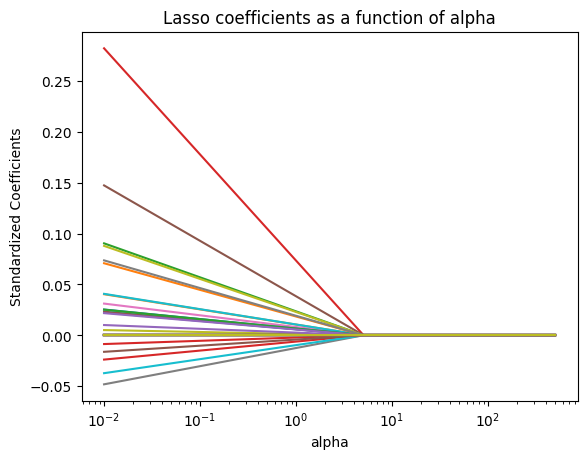

In [12]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

In [20]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X, y1)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [21]:
model.alpha_

0.0013370274999297766

In [22]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X, y1)

Lasso(alpha=0.0013370274999297766)

In [23]:
print(list(zip(lasso_best.coef_, X)))

[(0.014960026323127934, 'age'), (0.09700333307771757, 'male'), (0.10101920706080598, 'char_positivity'), (-0.08518507768614567, 'char_outgoing'), (0.015267099678494227, 'char_open'), (0.04642289794746305, 'char_friendly'), (0.01367772069880112, 'char_discipline'), (0.02493256596673421, 'char_social'), (-0.01746809440016941, 'char_economic'), (0.01842469531468874, 'face'), (0.025847778036980223, 'nose'), (0.08029006891758333, 'eyes'), (0.05106515074264332, 'mouth'), (0.2571289848963659, 'overall_feature'), (0.026912461036614668, 'skin'), (0.13979155503404764, 'hair'), (0.038889428289982896, 'acne'), (-0.20281098865738337, 'glasses'), (0.14027603485360096, 'double_eyelid'), (-0.004473338696398403, 'thick_eyebrow'), (-0.0, 'thick_lip'), (-0.0, 'long_hair'), (0.0018421666666602152, 'college_1'), (-0.13611109507301838, 'college_2'), (0.005181810826211249, 'college_3'), (-0.05280600692068512, 'college_4'), (-0.03527786571592191, 'college_5'), (0.0174649138337119, 'college_6'), (0.08812025138

In [24]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 50.28
R squared test set 47.94


In [25]:
mean_squared_error(y_test, lasso_best.predict(X_test))

0.44576058368003807

In [26]:
print(np.count_nonzero(model.coef_))

35
